# Alessio Reitano - 0001005384 - Project Work on Data Mining M

#### The mining project involves a dataset comprising movies and TV series, which is loaded using the Pandas library. Each record includes fields such as title, description, genres, cast, director, production country, addition date, year, age rating, duration, and season.

#### Following the import of necessary libraries, the initial step involves displaying information about the dataset, including its dimensions and column names.

#### Subsequently, a series of data preprocessing operations are performed:

  ####  1. Removal of irrelevant columns (e.g., 'Sl.No', 'Production Country', 'Added On', 'Season', 'Rating' ).
  ####  2. Elimination of duplicate values based on title and description.
  ####  3. Conversion of certain text columns to lowercase.
  ####  4. Handling of columns with missing values.

#### Text mining and processing techniques are then applied to the 'Description', 'Title', 'Genres', 'Cast', and 'Director' columns. This encompasses tasks such as punctuation removal, stop word elimination, stemming, and lemmatization.

#### The 'Genres', 'Director', 'Cast', 'Description', and 'Title' columns undergo transformation using the MultiLabelBinarizer technique. Due to the dataset's size, it was decided to retain only the 100 most frequently occurring columns, with a new 'Other' column created to encompass less common categories.

#### Prior to clustering, a Principal Component Analysis (PCA) is employed to visualize the data in a two-dimensional space. Subsequently, the KMeans algorithm is utilized for clustering, with the optimal number of clusters determined using the elbow method and silhouette score.

#### Finally, the distribution of clusters across different years is examined, and a Silhouette Plot is generated to assess the quality of the obtained clustering.

In [1]:
# Imports
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from string import punctuation
from wordcloud import WordCloud,STOPWORDS
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.decomposition import PCA

# Imports for clustering and plot
from plot_silhouette import plot_silhouette
from plot_clusters import plot_clusters
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

# Variables
file_name = 'movies_tv_shows.csv'
separator = ','
random_state = 43

# Directives
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 6]
np.random.seed(random_state)
plt.style.use('ggplot')

#### Loading the dataset from kaggle webiste

In [2]:
df = pd.read_csv(file_name, sep=separator, encoding = "ISO-8859-1") #dataset not in utf-8

#### Show the shape of the data

In [3]:
print("The dataframe size are: " + str(df.shape))

The dataframe size are: (12035, 13)


#### Show column name

In [4]:
df.columns

Index(['Sl.No', 'Title', 'Description', 'Genres', 'Cast', 'Director',
       'Production Country', 'Added On', 'Year', 'Text8', 'Duration(in Mins)',
       'Season', 'Rating'],
      dtype='object')

#### Show info columns

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12035 entries, 0 to 12034
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Sl.No               12034 non-null  float64
 1   Title               12035 non-null  object 
 2   Description         12035 non-null  object 
 3   Genres              12035 non-null  object 
 4   Cast                10533 non-null  object 
 5   Director            9892 non-null   object 
 6   Production Country  150 non-null    object 
 7   Added On            12035 non-null  object 
 8   Year                12034 non-null  float64
 9   Text8               11737 non-null  object 
 10  Duration(in Mins)   10136 non-null  object 
 11  Season              1900 non-null   object 
 12  Rating              937 non-null    object 
dtypes: float64(2), object(11)
memory usage: 1.2+ MB


#### Show a description of the dataframe

In [6]:
df.describe()

,Sl.No,Year
count,12034.000000,12034.000000
mean,6017.500000,2006.731677
std,3474.060904,22.160818
min,1.000000,1920.000000
25%,3009.250000,2006.000000
50%,6017.500000,2016.000000
75%,9025.750000,2020.000000
max,12034.000000,2022.000000


#### Show a total duplicate value

In [7]:
print('Total duplicate values: {}'.format(df.duplicated().sum()))

Total duplicate values: 0


#### Show portion of data

In [8]:
df.head()

,Sl.No,Title,Description,Genres,Cast,Director,Production Country,Added On,Year,Text8,Duration(in Mins),Season,Rating
0,1.0,An American Ghost Story,Paul Anderson (Stephen Twardokus) and his girl...,Horror,"Stephen Twardokus, Jon Gale, Liesel Kopp, Wend...",Derek Cole,NaN,"June 19, 2022",2012.0,18+,90,NaN,NaN
1,2.0,Back Door to Heaven,"A young kid, who starts out stealing small thi...","Action, Drama","Wallace Ford, Stuart Erwin",William K. Howard,NaN,"June 19, 2022",1939.0,7+,84,NaN,NaN
2,3.0,Big Timers,A wealthy young society man is dating a beauti...,"Arts, Entertainment, and Culture, Comedy","Stepin Fetchit, Francine Everett",Bud Pollard,NaN,"June 19, 2022",1945.0,7+,36,NaN,NaN
3,4.0,Brand of the Devil,Jolley is the leader of the Devil's Brand gang...,Western,"Dave O'Brien, James Newill",Harry L. Fraser,NaN,"June 19, 2022",1944.0,13+,57,NaN,NaN
4,5.0,Come As You Are,Three young men with disabilities (Grant Rosen...,"Comedy, Drama, Romance","Grant Rosenmeyer, Hayden Szeto, Ravi Patel, Ga...",Richard Wong,NaN,"June 19, 2022",2019.0,18+,107,NaN,NaN


## Pre-Processing

#### To remove the unaffected columns use the 'drop' method on the specific column

In [9]:
col_to_drop=["Sl.No","Production Country","Added On","Season","Rating"]
df1 = df.drop(col_to_drop,axis=1)

#### Drop Genres and replace

In [10]:
df1.drop(df1[df1['Genres'] == 'Genres'].index, inplace = True)
df1['Genres'] = df1['Genres'].str.replace('Arts, Entertainment, and Culture', 'Arts Entertainment and Culture')

#### To remove the duplicate values, use the 'drop_duplicates' method on Title and Description columns 

In [11]:
df1 = df1.drop_duplicates(["Title"])
print("Duplicates removed")
print("The dataframe size after remove duplicates for title are: " + str(df1.shape))

Duplicates removed
The dataframe size after remove duplicates for title are: (11383, 8)


In [12]:
df1 = df1.drop_duplicates(["Description"])
print("Duplicates removed")
print("The dataframe size after remove duplicates for description are: " + str(df1.shape))

Duplicates removed
The dataframe size after remove duplicates for description are: (11023, 8)


#### Show unique value

In [13]:
df1.nunique()

Title                11023
Description          11023
Genres                 623
Cast                  9210
Director              6819
Year                   102
Text8                   23
Duration(in Mins)      206
dtype: int64

#### Show the value null for columns

In [14]:
df1.isna().sum()

Title                   0
Description             0
Genres                  0
Cast                 1390
Director             2013
Year                    0
Text8                 281
Duration(in Mins)    1789
dtype: int64

#### To remove null values use the 'dropna' method

In [15]:
df1.dropna(inplace=True)

#### Show the shape of data after drop value

In [16]:
print("The dataframe size after drop value null are: " +str(df1.shape))

The dataframe size after drop value null are: (7921, 8)


#### Rename column Text8

In [17]:
df1.rename(columns={'Text8':'Rating'},inplace=True)

#### To convert textual columns to lowercase use the 'str.lower' method on Title, Description, Genres, Cast and Director columns

In [18]:
df1['Title'] = df1['Title'].str.lower()

In [19]:
df1['Description'] = df1['Description'].str.lower()

In [20]:
df1['Genres'] = df1['Genres'].str.lower()

In [21]:
df1['Cast'] = df1['Cast'].str.lower()

In [22]:
df1['Director'] = df1['Director'].str.lower()

#### Show portion of data df1

In [23]:
df1.head()

,Title,Description,Genres,Cast,Director,Year,Rating,Duration(in Mins)
0,an american ghost story,paul anderson (stephen twardokus) and his girl...,horror,"stephen twardokus, jon gale, liesel kopp, wend...",derek cole,2012.0,18+,90
1,back door to heaven,"a young kid, who starts out stealing small thi...","action, drama","wallace ford, stuart erwin",william k. howard,1939.0,7+,84
2,big timers,a wealthy young society man is dating a beauti...,"arts entertainment and culture, comedy","stepin fetchit, francine everett",bud pollard,1945.0,7+,36
3,brand of the devil,jolley is the leader of the devil's brand gang...,western,"dave o'brien, james newill",harry l. fraser,1944.0,13+,57
4,come as you are,three young men with disabilities (grant rosen...,"comedy, drama, romance","grant rosenmeyer, hayden szeto, ravi patel, ga...",richard wong,2019.0,18+,107


#### Columns type 

In [24]:
df1.dtypes

Title                 object
Description           object
Genres                object
Cast                  object
Director              object
Year                 float64
Rating                object
Duration(in Mins)     object
dtype: object

#### Occurrences by type of Rating

In [25]:
rating_count = df1["Rating"].value_counts()
rating_count 

13+         1975
16+         1498
18+         1406
R            941
ALL          511
PG-13        488
7+           473
PG           272
NR           247
G             69
UNRATED       32
NOT_RATE       4
AGES_18_       2
NC-17          2
16             1
Name: Rating, dtype: int64

#### This function allows you to group the results by mapping them to integers

In [26]:
def mergeRating(i):
    if i in ["G", "PG", "ALL", "ALL_AGES","TV-PG", "TV-Y", "TV-G"]:
        return 0
    elif i in ["7+", "TV"]:
        return 7
    elif i in ["13+", "PG-13", "TV-14"]:
        return 13
    elif i in ["16+", "16"]:
        return 16
    elif i in ["NC-17","TV-MA"]:
        return 17
    elif i in ["18+", "AGES_18_", "R"]:
        return 18
    elif i in ["NR", 'UNRATED', 'NOT_RATE', "TV-NR"]:
        return -1
    return i

df1["Rating"] = df1["Rating"].apply( mergeRating )

#### Plot histogram chart by rating

The histogram shows how many occurrences there are for each label


<AxesSubplot:xlabel='Rating', ylabel='count'>

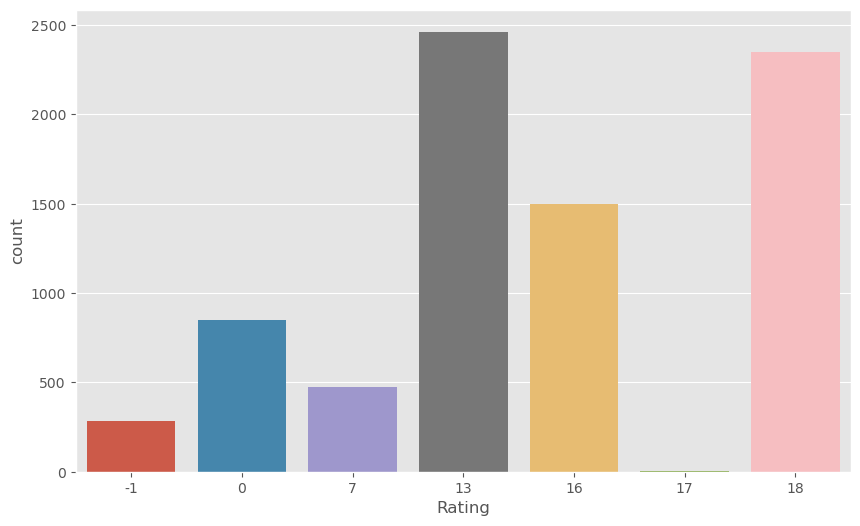

In [27]:
print("The histogram shows how many occurrences there are for each label")
sns.countplot(data=df1, x='Rating')

#### Plot histogram chart by year

The histogram shows how many occurrences there are for each year


<AxesSubplot:xlabel='count', ylabel='Year'>

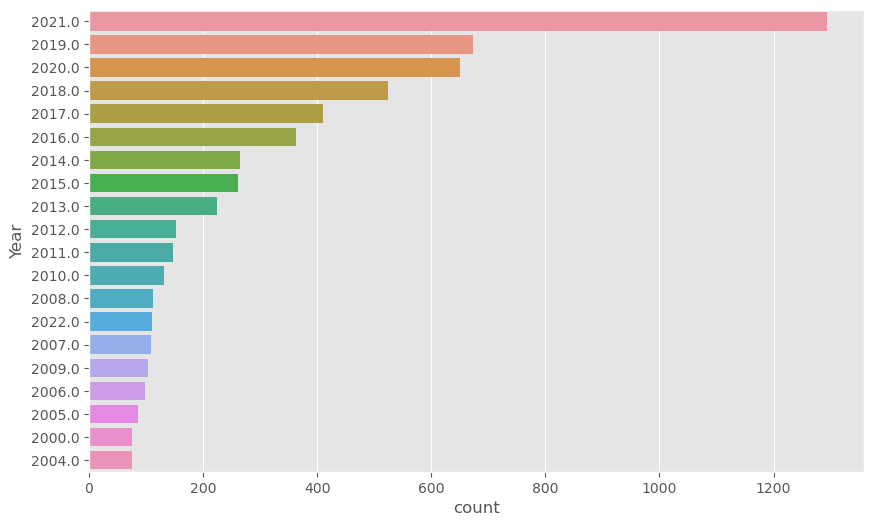

In [28]:
print("The histogram shows how many occurrences there are for each year")
sns.countplot(y=df1['Year'],data=df1,order=df1['Year'].value_counts().index[0:20])

## Text Processing and Text Mining

#### This function allows you to remove punctuation in specific text columns

In [29]:
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', punctuation))

#### Apply the function remove_punctuation

In [30]:
df1['Description'] = df1['Description'].apply(remove_punctuation)
df1['Title'] = df1['Title'].apply(remove_punctuation)

#### This function allows you to remove punctuation excpet comma and period in specific text columns 

In [31]:
import string

def remove_punctuation_except_comma_and_period(input_text):
    punctuation_except_comma_period = ''.join([p for p in string.punctuation if p not in [',', '.']])
    return input_text.translate(str.maketrans('', '', punctuation_except_comma_period))

# Apply the function
df1['Cast'] = df1['Cast'].apply(remove_punctuation_except_comma_and_period)

#### This function allows you to pre-process the text by identifying a token, i.e. a sequence of characters followed by a delimiter, removing the English stop words. Subsequently, the reduction of the terms to their "root" is carried out and the process of "lemmatization" is applied, which reduces the inflected forms of a word to a single dictionary term called 'lemma'.

In [32]:
# Create preprocess_text function
def preprocess_text(text):

    # Tokenize the text
    
    tokens = word_tokenize(text)
    
    # Remove stop words

    filtered_tokens = [token for token in tokens if token not in stopwords.words('english')]
    
    #Stemmer
    
    stemmer = PorterStemmer()
    
    stemmered_tokens = [stemmer.stem(token) for token in filtered_tokens]
    
    # Lemmatize the tokens

    lemmatizer = WordNetLemmatizer()

    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in stemmered_tokens]
    
    # Join the tokens back into a string

    processed_text = ' '.join(lemmatized_tokens)

    return processed_text

#### Apply the function preprocess_text on the specific columns

In [33]:
df1['Description'] = df1['Description'].apply(preprocess_text)
df1['Title'] = df1['Title'].apply(preprocess_text)

df1['Genres'] = df1['Genres'].str.strip()
df1['Genres'] = df1['Genres'].str.replace(" , ",",")
df1['Genres'] = df1['Genres'].str.replace(", ",",")
df1['Genres'] = df1['Genres'].str.replace(" ,",",")

df1['Director'] = df1['Director'].str.strip()
df1['Director'] = df1['Director'].str.replace(" , ",",")
df1['Director'] = df1['Director'].str.replace(", ",",")
df1['Director'] = df1['Director'].str.replace(" ,",",")

df1['Cast'] = df1['Cast'].str.strip()
df1['Cast'] = df1['Cast'].str.replace(" , ",",")
df1['Cast'] = df1['Cast'].str.replace(", ",",")
df1['Cast'] = df1['Cast'].str.replace(" ,",",")

#### Show portion of data

In [34]:
df1.head()

,Title,Description,Genres,Cast,Director,Year,Rating,Duration(in Mins)
0,american ghost stori,paul anderson stephen twardoku girlfriend stel...,horror,"stephen twardokus,jon gale,liesel kopp,wendy h...",derek cole,2012.0,18,90
1,back door heaven,young kid start steal small thing order fit cr...,"action,drama","wallace ford,stuart erwin",william k. howard,1939.0,7,84
2,big timer,wealthi young societi man date beauti young wo...,"arts entertainment and culture,comedy","stepin fetchit,francine everett",bud pollard,1945.0,7,36
3,brand devil,jolley leader devil brand gang rustler molli d...,western,"dave obrien,james newill",harry l. fraser,1944.0,13,57
4,come,three young men disabl grant rosenmey hayden s...,"comedy,drama,romance","grant rosenmeyer,hayden szeto,ravi patel,gabou...",richard wong,2019.0,18,107


#### Multiclass or multilabel target variable encoding is the process of transforming a set of labels into a binary representation, where each label is represented as a vector of binary values.

In [35]:
mlb = MultiLabelBinarizer()

genres = pd.DataFrame(mlb.fit_transform(df1['Genres'].str.split(',')),columns = mlb.classes_, index = df1.index)
director = pd.DataFrame(mlb.fit_transform(df1['Director'].str.split(',')),columns = mlb.classes_, index = df1.index)
cast = pd.DataFrame(mlb.fit_transform(df1['Cast'].str.split(',')),columns = mlb.classes_, index = df1.index)
description = pd.DataFrame(mlb.fit_transform(df1['Description'].str.split()), columns = mlb.classes_, index = df1.index)
title = pd.DataFrame(mlb.fit_transform(df1['Title'].str.split()), columns = mlb.classes_, index = df1.index)

#### This function allows you to return a new DataFrame containing only the 100 most frequent columns and an additional column called "Other". This column "Other" will contain the value 1 if the column name is not among the most frequent 100, otherwise it will contain the value 0.

In [36]:
def find_top_columns(dataset):
    
    # Calculate the sum for each column
    column_sums = dataset.sum(axis=0)
    
    # Create a dictionary that maps column names to sums
    column_dict = {column_name: column_sum for column_name, column_sum in zip(dataset.columns, column_sums)}
    
    # Create a Counter object to count the frequencies of column names
    column_counts = Counter(column_dict)
    
    # Find the 100 most frequent column names
    top_columns = [column_name for column_name, _ in column_counts.most_common(100)]
    
    # Select the 100 most frequent columns and create a copy of the dataset with only these columns
    top_dataset = dataset[top_columns].copy()
    
    # Create a new column "other" with values 1 if the name is not among the 100 most frequent columns, otherwise 0
    top_dataset['Other'] = dataset.apply(lambda row: 1 if row.name not in top_columns else 0, axis=1)
    
    return top_dataset

#### Apply the funcion find_top_columns

In [37]:
cast_top_100 = find_top_columns(cast)
director_top_100 = find_top_columns(director)

#### Create a new dataframe that concatenates the following values

In [38]:
df2 = pd.concat([df1, title, description, genres, director_top_100, cast_top_100],axis=1)

#### To find the most frequent words in a column use the method "str.split(). explode().str.strip()

In [39]:
freq_cast = df2['Cast'].str.split(',').explode().str.strip()
print(freq_cast.value_counts()[:20])

roy rogers                           47
gene autry                           36
george gabby hayes                   34
john wayne                           29
champion                             28
prakash raj                          27
annemarie newland                    25
                                     25
anupam kher                          24
nassar                               22
amitabh bachchan                     22
cassandra peterson                   21
rani mukerji                         21
danny trejo                          20
eric roberts                         19
rishi kapoor                         18
ph.d.                                17
eddie izzard                         17
michael madsen                       16
mystery science theater 3000 guys    16
Name: Cast, dtype: int64


In [40]:
freq_genres = df2['Genres'].str.split(',').explode().str.strip()
print(freq_genres.value_counts()[:20])

drama                             3832
comedy                            2179
action                            1678
suspense                          1531
horror                             942
romance                            639
special interest                   578
international                      558
arts entertainment and culture     540
documentary                        515
science fiction                    411
kids                               378
adventure                          324
western                            295
arthouse                           158
animation                          152
fantasy                            110
lgbtq                              110
sports                             104
music videos and concerts           71
Name: Genres, dtype: int64


In [41]:
freq_genres = df2['Director'].str.split(',').explode().str.strip()
print(freq_genres.value_counts()[:20])

joseph kane           38
mark knight           38
isaac halasima        29
sam newfield          25
aaron stephenson      24
manny rodriguez       23
jay chapman           23
john english          18
brian volk-weiss      18
cannis holder         17
d.j. viola            17
george archainbaud    14
william nigh          14
robert n. bradbury    14
yash chopra           13
william wyler         12
frank mcdonald        12
lesley selander       12
mora tv               12
michael feifer        11
Name: Director, dtype: int64


#### Show wordcloud for Cast

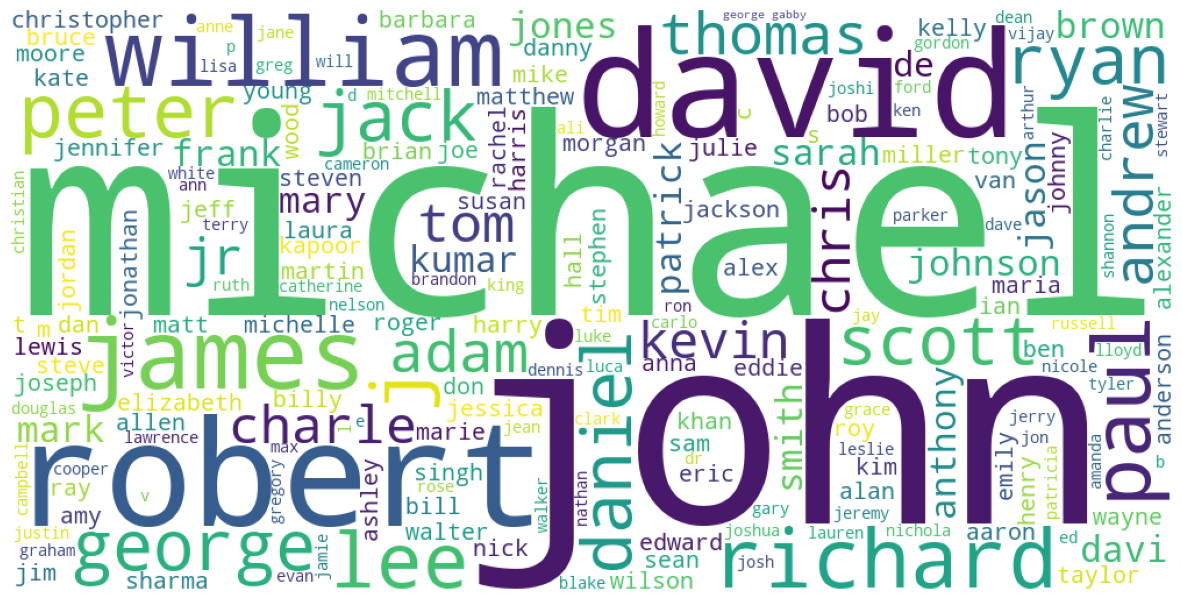

In [42]:
wordcloud_description = WordCloud(width=1000,height=500, stopwords=STOPWORDS, background_color='white').generate(''.join(df2['Cast']))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud_description)
plt.axis("off")
plt.show()

#### Show wordcloud for Title

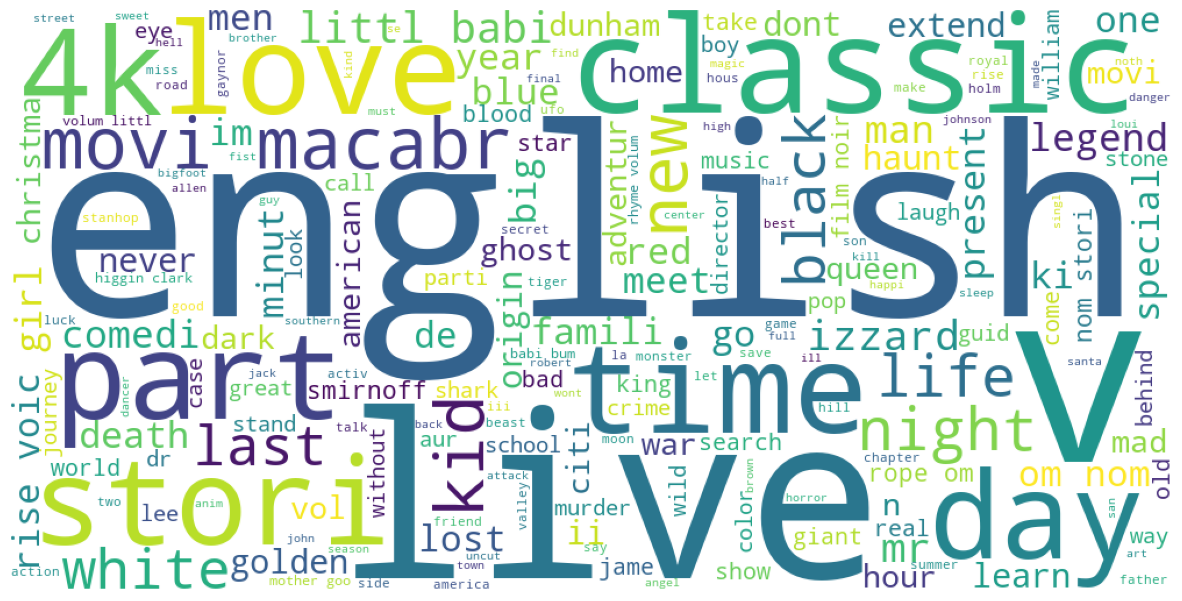

In [43]:
wordcloud_title = WordCloud(width=1000,height=500, stopwords=STOPWORDS, background_color='white').generate(''.join(df2['Title']))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud_title)
plt.axis("off")
plt.show()

#### Show wordcloud for Director

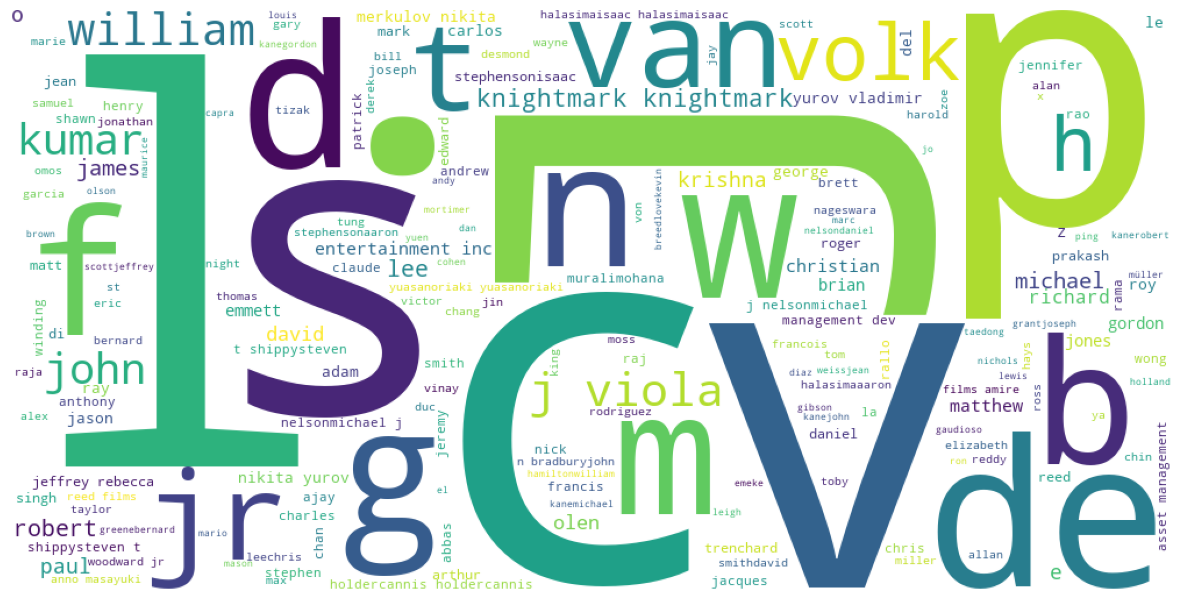

In [44]:
wordcloud_director = WordCloud(width=1000,height=500, stopwords=STOPWORDS, background_color='white').generate(''.join(df2['Director']))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud_director)
plt.axis("off")
plt.show()

#### Show wordcloud for Genres

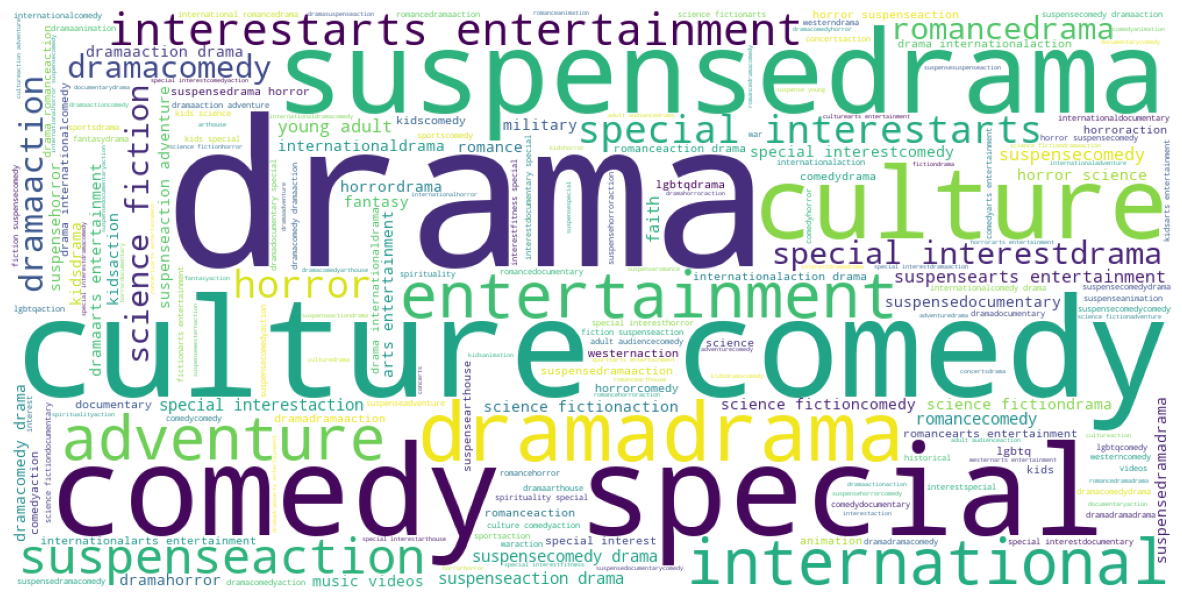

In [45]:
wordcloud_genres = WordCloud(width=1000,height=500, stopwords=STOPWORDS, background_color='white').generate(''.join(df2['Genres']))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud_genres)
plt.axis("off")
plt.show()

#### Create a new dataframe after drop the other column

In [46]:
df3 = df2.drop(['Genres','Title','Description','Cast','Director'],axis=1)

#### Convert the column to a numeric column

In [47]:
df3['Duration(in Mins)']=pd.to_numeric(df3['Duration(in Mins)'])

#### Convert the column to a int column

In [48]:
df3['Year'] = df3['Year'].astype(int)

#### Show a data df3

In [49]:
df3.head()

,Year,Rating,Duration(in Mins),0,0121,1,10,100,100m,100minut,...,billy zane,brahmanandam,brian cox,chill wills,christian slater,desmond llewelyn q,george cleveland,goundamani,jayaprakash,Other
0,2012,18,90,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1939,7,84,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1945,7,36,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1944,13,57,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,2019,18,107,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


### PCA aims to transform a dataset of potentially correlated variables into a new set of uncorrelated variables called principal components.

In [ ]:
pca = PCA()
X = pca.fit_transform(df3)
explained_variance=pca.explained_variance_ratio_

In [ ]:
pca.get_covariance()

ValueError: shape mismatch: objects cannot be broadcast to a single shape

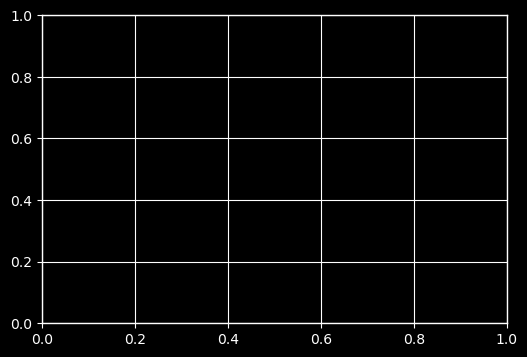

In [65]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(7), explained_variance, alpha=0.5, align='center',
            label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

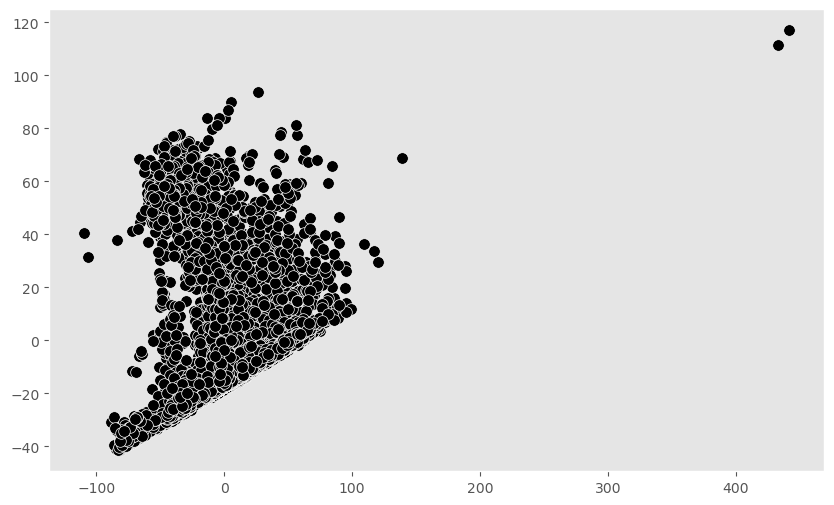

In [51]:
focus = [0,1]
plt.scatter(X[:,focus[0]], X[:,focus[1]]
            , c='black'          # color filling the data markers
            , edgecolors='white' # edge color for data markers
            , marker='o'         # data marker shape, e.g. triangles (v<>^), square (s), star (*), ...
            , s=70)              # data marker size
plt.grid()  # plots a grid on the data
plt.show()

## *Clustering KMeans*

#### Using the elbow method to find the optimal number of clusters
#### I will try k_means with a number of clusters varying from 2 to 10
#### -Prepare two emptys lists for inertia and silhouette scores
#### -After the loop, you will have two lists, 'distortions' and 'silhouette_scores', containing the evaluation metrics for each value of 'k'. These lists can be used to visualize how the quality of clustering changes with the number of clusters and help you determine the optimal number of clusters for your data.

In [52]:
# Range of possible clusters
k_range = range(2,10)

# Distortion and Silhouette Score as measures
distortions = []
silhouette_scores = []

for i in k_range:
    km = KMeans(n_clusters = i,
    init = 'k-means++',
    n_init = 10,
    max_iter = 300,
    random_state = random_state)
    y_km = km.fit_predict(df3)
    distortions.append(km.inertia_)
    silhouette_scores.append(silhouette_score(df3,y_km))

#### Plot distortion and silhouette indexes

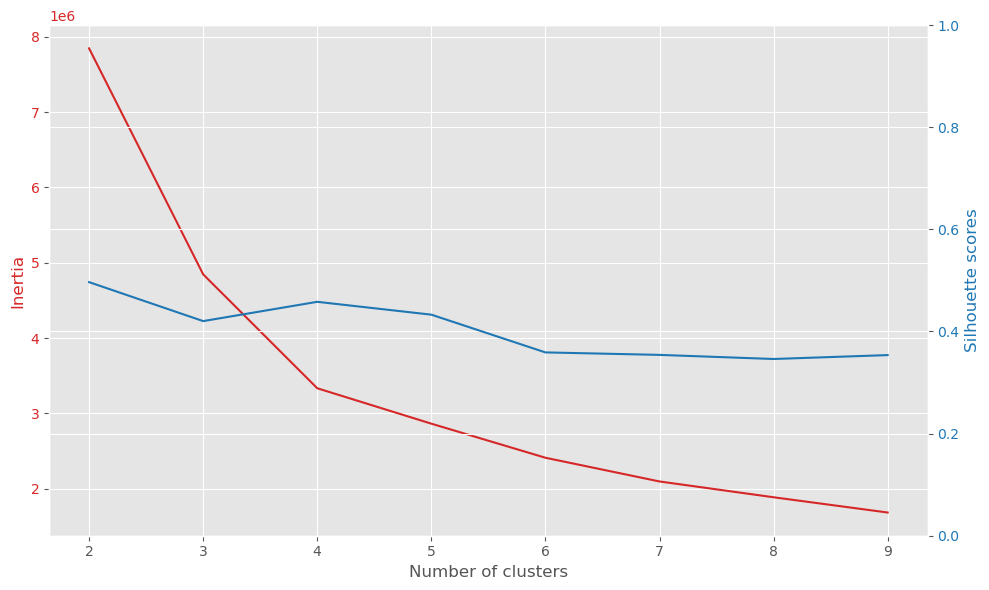

In [53]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Number of clusters')
ax1.set_ylabel('Inertia', color=color)
ax1.plot(k_range, distortions, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Silhouette scores', color=color)  # we already handled the x-label with ax1
ax2.plot(k_range, silhouette_scores, color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim(0,1) # the axis for silhouette is [0,1]

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

#### I choose the value 4 as number of clusters

In [54]:
good_k = 4
km = KMeans(n_clusters=good_k, 
            init='k-means++', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=random_state)
y_km = km.fit_predict(df3)
centroids = km.cluster_centers_
unique_labels = np.unique(y_km)

#### Plot the result of the clusters with module plot_clusters previously imported

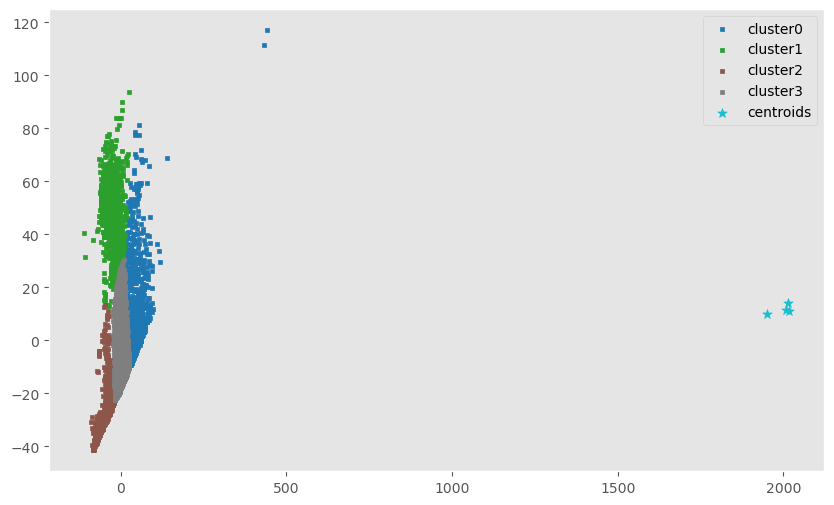

In [55]:
plot_clusters(X, y_km, dim = (focus[0],focus[1]), points = km.cluster_centers_)

#### This feature is useful for visually exploring how the features in the DataFrame are distributed among the clusters obtained by the K-Means algorithm, helping to identify any significant differences between the clusters.

In [56]:
def generate_kmeans_cluster_boxplots(data, y_km):
    data_with_clusters = data.copy()
    data_with_clusters['Cluster'] = y_km

    plt.figure(figsize=(12, 8))
    sns.boxplot(x='Cluster', y=data.columns[0], data=data_with_clusters)
    plt.title('Boxplot dei Cluster ottenuti con K-Means')
    plt.xlabel('Cluster')
    plt.ylabel(data.columns[0])
    plt.show()

    for feature in data.columns[1:3]:
        plt.figure(figsize=(12, 8))
        sns.boxplot(x='Cluster', y=feature, data=data_with_clusters)
        plt.title(f'Boxplot dei Cluster ottenuti con K-Means - {feature}')
        plt.xlabel('Cluster')
        plt.ylabel(feature)
        plt.show()

#### Apply the function generate_kmeans_cluster_boxplots

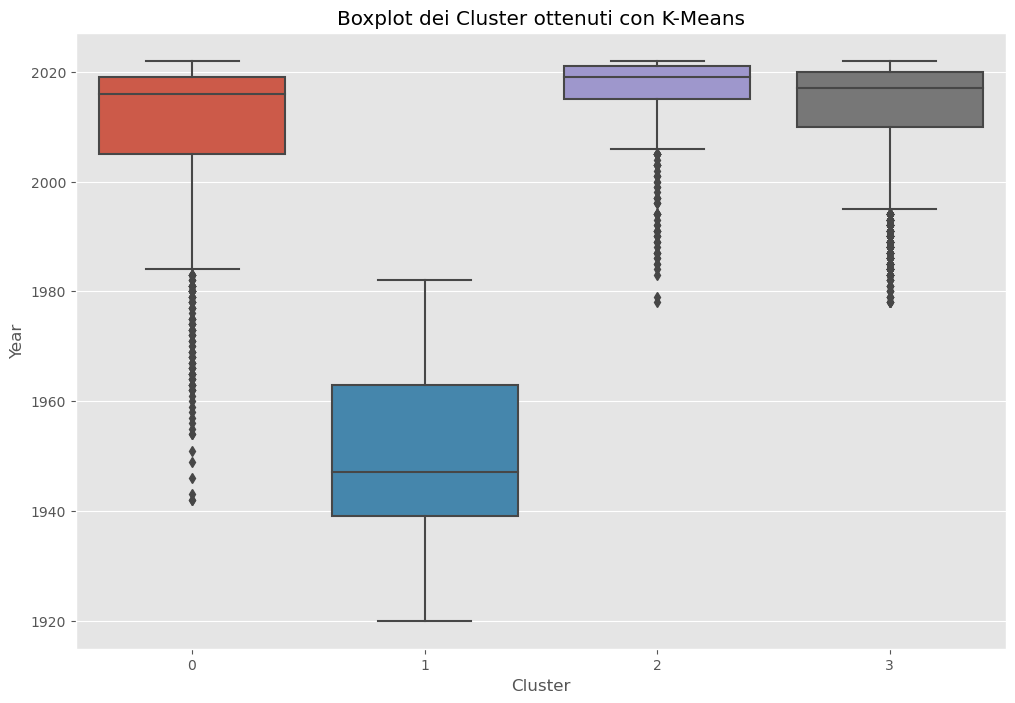

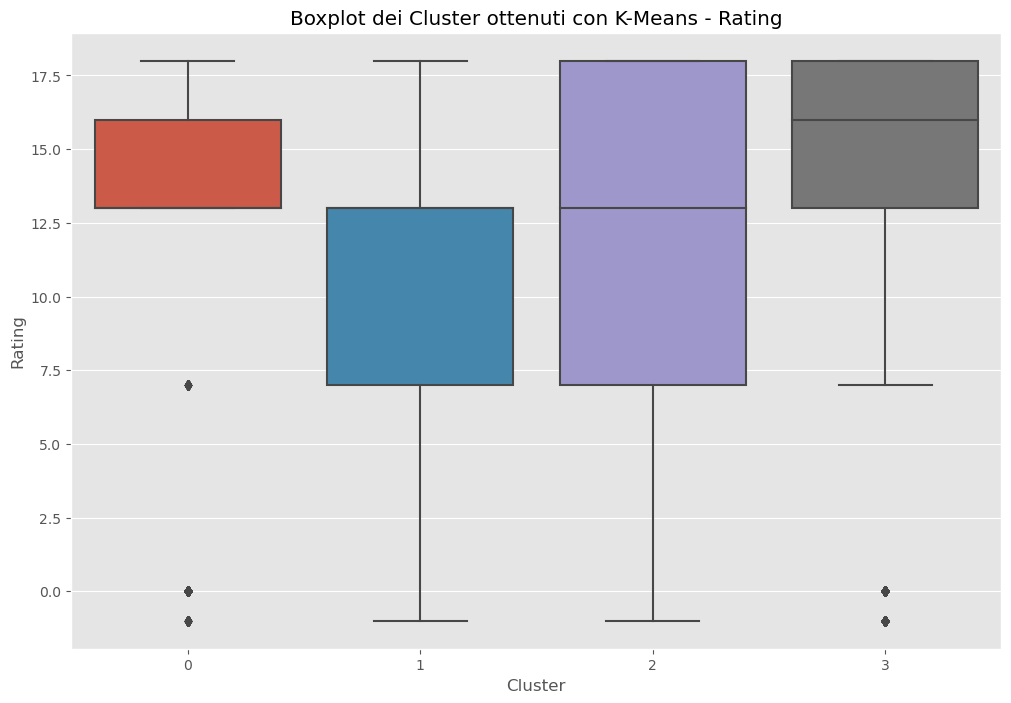

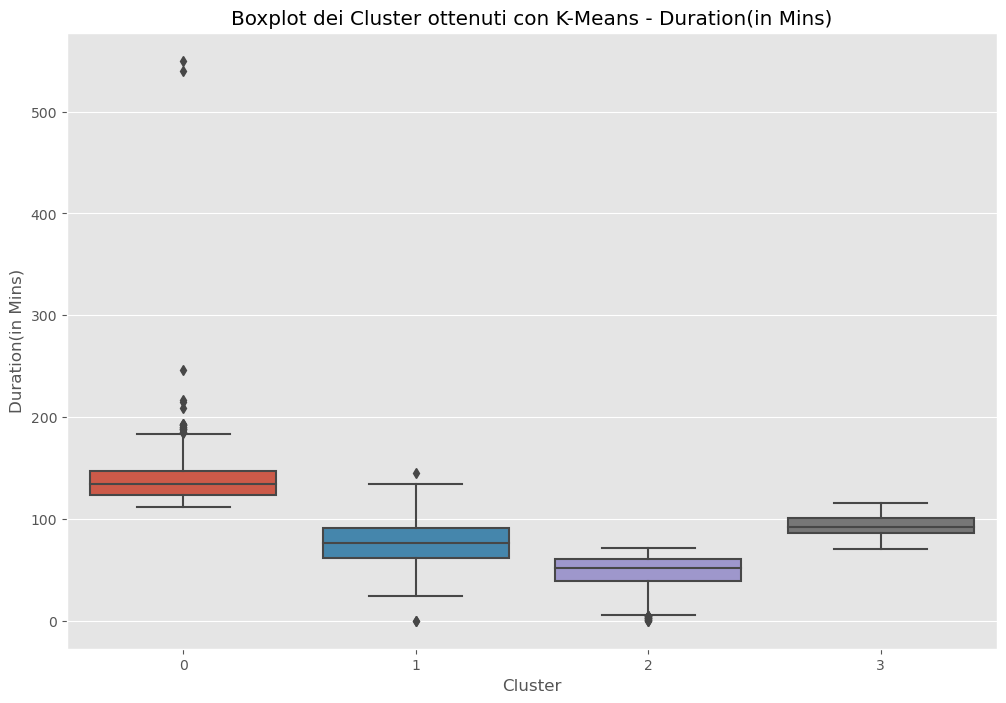

In [57]:
generate_kmeans_cluster_boxplots(df3,y_km)

#### Print the distortion

In [58]:
print('Distortion: %.2f' % km.inertia_)

Distortion: 3334685.84


## Quantifying the quality of clustering via silhouette plots

#### High Silhouette Scores near +1 indicate well-separated clusters, while negative scores indicate that samples might have been assigned to the wrong clusters. By visualizing the Silhouette Scores for different cluster numbers, you can determine the optimal number of clusters (often referred to as the "elbow point"), which is the number of clusters that provides the best overall structure and separation among the samples.

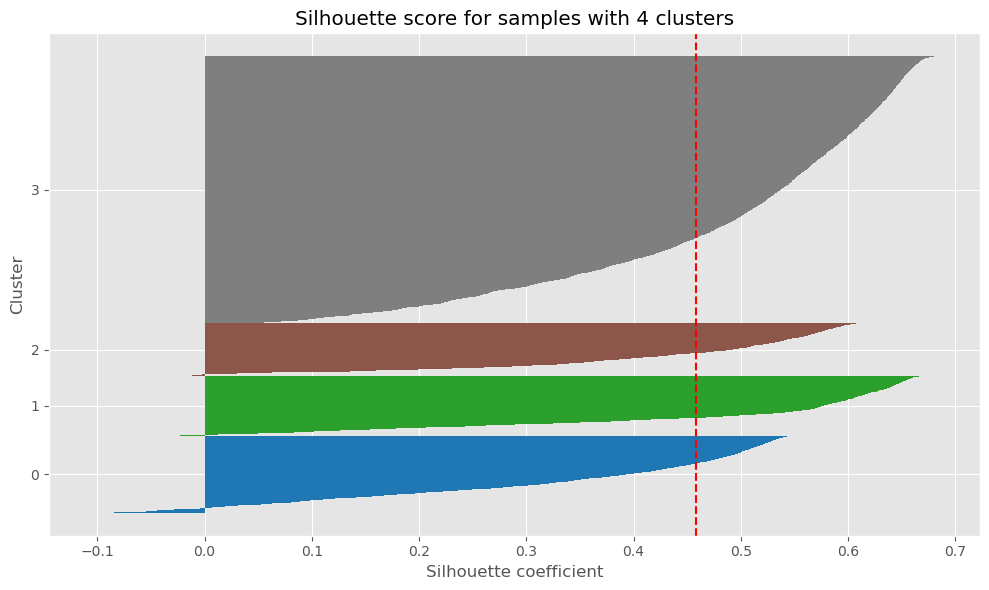

In [59]:
silhouette_vals = silhouette_samples (df3,y_km, metric = 'euclidean')
plt.title('Silhouette score for samples with {} clusters'.format(good_k))
plot_silhouette(silhouette_vals,y_km)

#### Creates an array containing the values of the Year column

In [60]:
anni = np.array(df3['Year'])

#### This function is designed to plot the distribution of data points in different clusters over the years. It uses K-means clustering to group the data points into clusters based on their features, and then analyzes how these clusters are distributed across different years.

In [61]:
# Function to view the distribution of clusters over the years
def plot_kmeans_cluster_distribution(X, anni, num_cluster):
    
    # Creation of the K-means model
    kmeans = KMeans(n_clusters=num_cluster)
    kmeans.fit(X)

    # Assignment of clusters to each data
    cluster_labels = kmeans.labels_

    # Calculation of cluster distribution over the years
    anni_unici, cluster_counts = np.unique(np.column_stack((anni, cluster_labels)), axis=0, return_counts=True)

    # Creation of the cluster distribution graph over the years
    unique_clusters = np.unique(cluster_labels)
    num_bins = len(unique_clusters)
    colors = plt.cm.rainbow(np.linspace(0, 1, num_bins))

    fig, axs = plt.subplots(num_cluster, sharex=True, sharey=True)

    for i, cluster_label in enumerate(unique_clusters):
        cluster_indices = np.where(cluster_labels == cluster_label)
        cluster_anni = anni[cluster_indices]

        axs[i].hist(cluster_anni, bins=num_bins, color=colors[i])
        axs[i].set_ylabel(f'Cluster {cluster_label}')
    
    axs[-1].set_xlabel('Anni')
    plt.title('Distribuzione dei Cluster K-means negli Anni')
    plt.tight_layout()
    plt.show()


#### Plot the cluster distributed for year

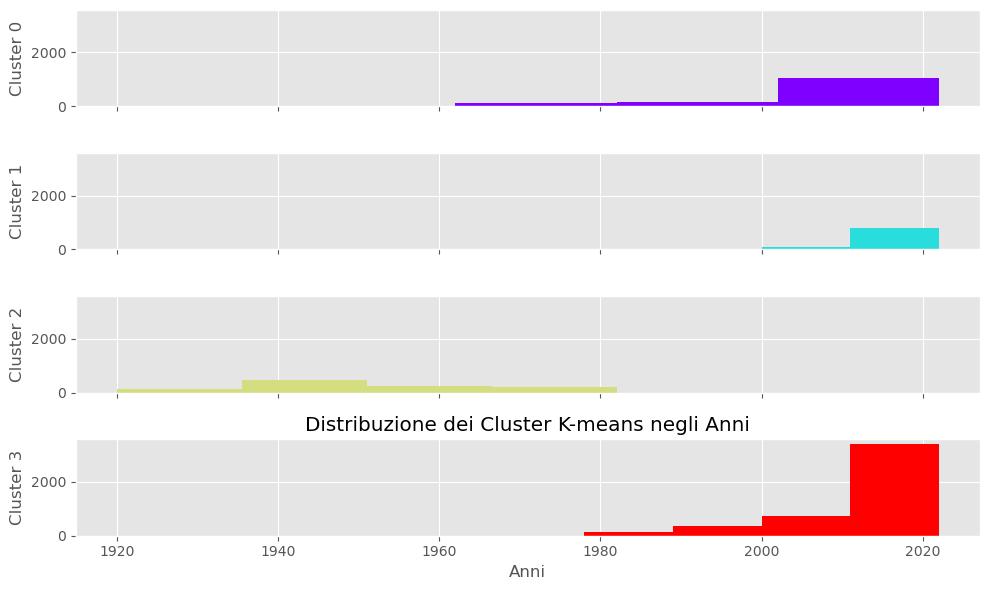

In [62]:
plot_kmeans_cluster_distribution(df3, anni, good_k)

### 

### In conclusion, after having done the clustering and visualized in particular the boxplot, we can say that:
   #### - Cluster 0 contains recent movies or TV series visible from 13 years onwards and that have an average duration of 100 minutes;
   #### - Cluster 1, on the other hand, refers to films developed between '40 and '60, visible from 7 to 13 years and lasting less than 100 minutes;
   #### - Cluster 2 is about recent films or TV series, visible from 13 to 16 years, which have a duration of more than 100 but less than 200 minutes
  ####  - Cluster 3, finally, refers to recent films or TV series, with a rating between 7 and 18 years, and which have a duration of less than 100 minutes.